In [11]:
import os, sys, cv2
sys.path.append("/Users/susung/Documents/02_Projects/porterble/")
from cv2 import aruco
from matplotlib import pyplot as plt
import matplotlib 

In [4]:
from scripts.vehicle_interface.retina.camera_handler import *

In [5]:
camera = CameraHandler()

In [7]:
camera.start_stream()

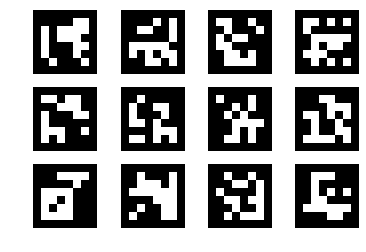

In [16]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

fig = plt.figure()
nx = 4
ny = 3
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.drawMarker(aruco_dict,i, 700)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")

plt.savefig("./markers.png")
plt.show()

In [17]:
frame = cv2.imread("./markers.png")

In [18]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

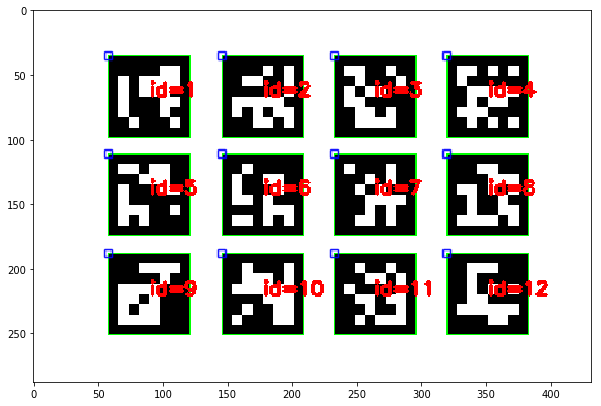

In [21]:
plt.figure(1, figsize=[10, 7])
plt.imshow(frame_markers)
plt.show()